In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline


# IMPORT AND CLEAN THE DATA

In [2]:
f1 = pd.read_json("data/SpotifyData.json")

df_BL = pd.read_csv("data/brendan-spotify.csv")
df_NL = pd.read_csv("data/nick-spotify.csv")
df_BT = pd.read_csv("data/btam-spotify.csv")
df_DD = pd.read_csv("data/danica-spotify.csv")
df_TLC = pd.read_csv("data/toma-spotify.csv")

frames = [df_BL, df_NL, df_BT, df_DD, df_TLC]

personal_df = pd.concat(frames).reset_index(drop=True) 
f1 = f1.drop(columns=['track_id', 'key', 'mode', 'time_signature', 'duration_ms','instrumentalness'])

# Rename certain columns
personal_df = personal_df.rename(columns={"Song": "track_name", 
                            "Artist": "artist_name", 
                            "dance": "danceability", 
                            "dB": "loudness",
                            "bpm": "tempo",
                            "liveliness":"liveness",
                            })

# Rearrange to match order of master set
personal_df = personal_df[['artist_name', 
                           'track_name',
                           'popularity',
                           'danceability',
                           'energy',
                           'speechiness',
                           'acousticness',
                           'liveness',
                           'valence',
                           'tempo',]]

df = pd.concat([f1, personal_df])
df = df.drop_duplicates(subset=['track_name','artist_name'], keep='first', inplace=False, ignore_index=False )
# df = df.drop(["loudness"], axis=1)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22663 entries, 0 to 3694
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   artist_name   22663 non-null  object 
 1   track_name    22663 non-null  object 
 2   popularity    22663 non-null  int64  
 3   danceability  22663 non-null  float64
 4   energy        22663 non-null  float64
 5   loudness      20745 non-null  float64
 6   speechiness   22663 non-null  float64
 7   acousticness  22663 non-null  float64
 8   liveness      22663 non-null  float64
 9   valence       22663 non-null  float64
 10  tempo         22663 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 2.1+ MB
None


,artist_name,track_name,popularity,danceability,energy,loudness,speechiness,acousticness,liveness,valence,tempo
0,24kGoldn,Mood (feat. iann dior),99,0.700,0.722,-3.558,0.0369,0.221,0.2720,0.756,90.989
1,Ariana Grande,34+35,97,0.830,0.585,-6.476,0.0940,0.237,0.2480,0.485,109.978
2,Ariana Grande,positions,99,0.737,0.802,-4.771,0.0878,0.468,0.0931,0.682,144.015
3,CJ,Whoopty,96,0.711,0.598,-7.621,0.1820,0.190,0.1500,0.737,140.175
4,The Kid LAROI,WITHOUT YOU,96,0.662,0.413,-7.357,0.0299,0.213,0.1340,0.467,93.005
...,...,...,...,...,...,...,...,...,...,...,...
3690,April Wine,Roller,35,43.000,90.000,NaN,9.0000,0.000,14.0000,66.000,141.000
3691,David Bowie,Ziggy Stardust - 1990 Remaster,35,41.000,51.000,NaN,12.0000,7.000,38.0000,51.000,161.000
3692,Eddie Money,Two Tickets To Paradise,29,60.000,85.000,NaN,3.0000,20.000,10.0000,70.000,130.000
3693,April Wine,Bad Side of the Moon,26,41.000,78.000,NaN,34.0000,83.000,25.0000,54.000,181.000


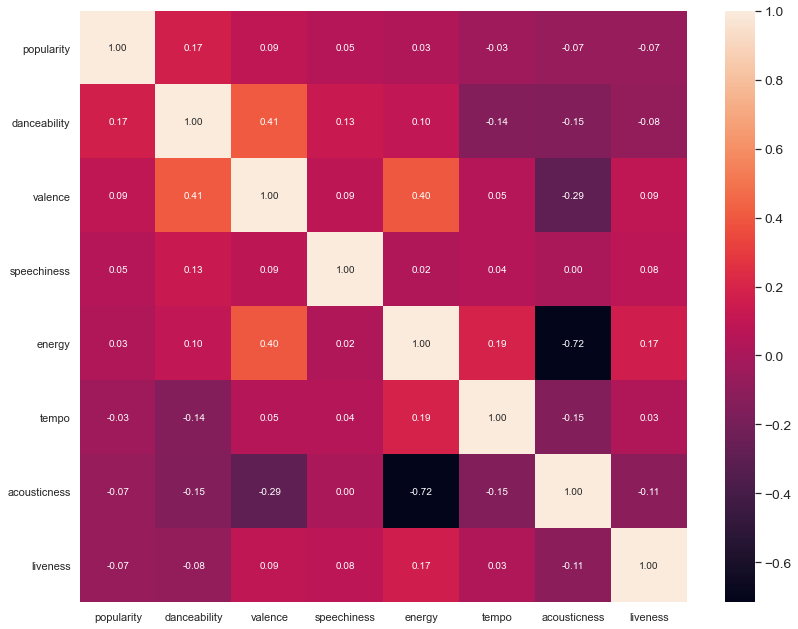

In [3]:
# creating a correlation matrix for our personal dataframes
corr = personal_df.corr()

# focused heatmap - Popularity
# number of variables to be selected
k = 10

# finding the most correlated variables
cols = corr.nlargest(k, 'popularity')['popularity'].index
cm = np.corrcoef(personal_df[cols].values.T)

#plotting the heatmap
f, ax = plt.subplots(figsize=(12,9))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()

In [4]:
# creating a correlation matrix for our master dataframe 
#----THIS IS UNFINISHED DUE TO DATA INCONSISTENCIES----#

# corr = df.corr()

# # focused heatmap - Popularity
# # number of variables to be selected
# k = 10

# # finding the most correlated variables
# cols = corr.nlargest(k, 'popularity')['popularity'].index
# cm = np.corrcoef(df[cols].values.T)

# #plotting the heatmap
# f, ax = plt.subplots(figsize=(12,9))
# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
# plt.tight_layout()

## Trying to create group profile centred playlists using the following methods

In [5]:
def PrintCombinedMeanPlaylist(frames, playlistLen):
    """
    frames: list of the df containing indvidiual song libraries
    playlistLen: Length of the desired playlist
    """
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the datasets drop any duplicates
    df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    
    # Calculate required values
    num_songs = len(df)
    means = df.mean(axis = 0, skipna = True) 
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - means['energy']) * 0.25
                       + abs(x['dance'] - means['dance']) * 0.25
                       + abs(x['liveliness'] - means['liveliness']) * 0.25
                       + abs(x['valence'] - means['valence']) * 0.25
                  )
    
    return (df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])
      
def PrintCombinedMedianPlaylist(frames, playlistLen):
    """
    frames: list of the df containing indvidiual song libraries
    playlistLen: Length of the desired playlist
    """
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the datasets drop any duplicates
    df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    
    # Calculate required values
    num_songs = len(df)
    medians = df.median(axis = 0, skipna = True) 
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - medians['energy']) * 0.25
                       + abs(x['dance'] - medians['dance']) * 0.25
                       + abs(x['liveliness'] - medians['liveliness']) * 0.25
                       + abs(x['valence'] - medians['valence']) * 0.25
                  )
    
    return (df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])

## Way to try make mood based group playlists

In [6]:
def MoodBasedPlaylist(frames, playlistLen, moodProfile, weightParams):
    """
    frames: list of the df containing individual song libraries
    playlistLen: Length of the desired playlist output
    moodProfile: List [energy, dance, liveliness, valence, popularity] providing the mood desired
    """
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the 
    df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    
    df = df.drop_duplicates(subset=['Song','Artist'], keep='first', inplace=False, ignore_index=False )
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - moodProfile[0]) * weightParams[0]
                       + abs(x['dance'] - moodProfile[1]) * weightParams[1]
                       + abs(x['valence'] - moodProfile[2]) * weightParams[2]
                       + abs(x['popularity']- moodProfile[3]) * weightParams[3]
                  )
    
    return (df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])

def PartyPlaylist(frames, playlistLen, moodProfile, weightParams):
    """
    frames: list of the df containing individual song libraries
    playlistLen: Length of the desired playlist output
    moodProfile: List [energy, dance, liveliness, valence, popularity] providing the mood desired
    """
    if(type(playlistLen) != (int)):
        return "playlist length not type int"
    
    # Concatenate all the 
    df = pd.concat(frames).drop_duplicates().reset_index(drop=True)
    
#     df_return = df['Artist'].value_counts()
    # 
    
    df = df.drop_duplicates(subset=['Song','Artist'], keep='first', inplace=False, ignore_index=False )
    
    # Calculates song difference attribute for each song
    df = df.assign(delta=lambda x: 
                       abs(x['energy'] - moodProfile[0]) * weightParams[0]
                       + abs(x['dance'] - moodProfile[1]) * weightParams[1]
                       + abs(x['valence'] - moodProfile[2]) * weightParams[2]
                       + abs(x['popularity']- moodProfile[3]) * weightParams[3]
                  )
    party_df = df.loc[df['Genre'] == ('dance pop' or 'big room' or 'edm' or 'hip hop' or 'house' or 'bass trap')]
    
    return (party_df.sort_values(by='delta', ascending=True).head(playlistLen)[['Song', 'Artist']])

Some basic information that can help you derive useful parameters for the algorithms

All genres occuring at least 75 times
dance pop               496
indie pop               209
electropop              155
big room                152
album rock              145
contemporary country    137
alternative r&b         132
pop                     102
modern rock             100
folk-pop                 97
bedroom pop              78
Name: Genre, dtype: int64


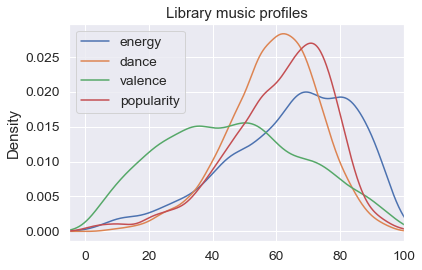

In [7]:
frames = [df_BL, df_BT, df_DD, df_NL, df_TLC]
df = pd.concat(frames).drop_duplicates().reset_index(drop=True)

# Help provide context on what to use for the mood profile list
df.plot(y=['energy', 'dance', 'valence', 'popularity'],kind='density', xlim=[-5,100], title="Library music profiles")

group_means = df.mean(axis = 0, skipna = True) 
# print(group_means)

group_medians = df.median(axis = 0, skipna = True)
# print(group_medians)

print("Some basic information that can help you derive useful parameters for the algorithms")

genre_df = df['Genre'].value_counts()
popular_genres = genre_df.drop(genre_df[genre_df < 75].index)
print("\nAll genres occuring at least 75 times")
print(popular_genres)

# Tinker with the lists to to try optimize a playlist based solution. 
[ Energy , Dancability, Valence, Popularity ] is the order for both the weight params list and _mood_Profile 


### Dissatisified with party and happy still
### TBD trying to determine the best weightings above as well for inside the delta function

In [8]:
# Party list
weightParams = [0.25, 0.5, 0.1, 0.15]
partyProfile = [90, 80, 85, 75] 
print("Party playlist??\n", PartyPlaylist([df_BL, df_NL, df_DD, df_BT, df_TLC], 15, partyProfile, weightParams))

# Happy list
weightParams = [0.1, 0.3, 0.3, 0.3]
partyProfile = [95, 80, 70, 75] 
print("\n\nHappy playlist??\n", MoodBasedPlaylist([df_BL, df_NL, df_DD, df_BT, df_TLC], 15, partyProfile, weightParams))

# Sad list
weightParams = [0.225, 0.225, 0.15, 0.25]
sadProfile = [30, 20, 15, 75]
print("\n\nSad playlist??\n", MoodBasedPlaylist([df_BL, df_NL, df_DD, df_BT, df_TLC], 15, sadProfile, weightParams))

Party playlist??
                                                  Song                   Artist
188                             Red Light Green Light              Duke Dumont
917                     Troublemaker (feat. Flo Rida)                Olly Murs
1435                                         Drive By                    Train
1027  4 Minutes (feat. Justin Timberlake & Timbaland)                  Madonna
1622         White Walls (feat. ScHoolboy Q & Hollis)  Macklemore & Ryan Lewis
828                                           Whistle                 Flo Rida
982                                      Fire Burning            Sean Kingston
937                                        Poker Face                Lady Gaga
1044                                        Telephone                Lady Gaga
952                                          Dynamite                Taio Cruz
904                                      Ready or Not          Bridgit Mendler
164      Love Is Religion (The Ble